# Pytorch introduction

This section is intended for those who are beginners in Deep Learning with PyTorch. 
Here, we are going to learn about data loading in PyTorch, we are also going to learn about the basics of learning a deep learning model and saving it to the disk. Hopefully, after this section, you will have everything you need to move forward with PyTorch ! 

If you are a complete beginner in machine learning, we suggest that you first get an intuition on how these methods work. For this, you can watch the excellent series by 3blue1brown on YouTube : https://www.youtube.com/watch?v=aircAruvnKk&t=162s

## What is PyTorch ? 

PyTorch is a Deep Learning framework that countains many useful functions and classes for learning a Deep Learning model. Deep Learning frameworks must meet the challenge of containing many usefull, state of the art, and up to date Deep Learning methods while still being flexible enough to allow building new methods from existing ones. 

There are many Deep Learning frameworks, however, PyTorch is intuitive for those who are already familiar with Python as the project aimed to opperate in similar fashion to other popular Python librairies (such as Numpy). 

Therefore, we chose PyTorch for this tutorial. You can learn more about PyTorch here : https://pytorch.org/

### Importing libraries 

In [2]:
import torch 
import torchvision
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from torch import optim 
from torch.autograd import Variable
import matplotlib.pyplot as plt

## Data processing 

In this section, we will talk about data processing, data downloading and an introduction on how data is organised in order to be fed to Neural Networks

For this tutorial, we will use the MNIST dataset, PyTorch has built in functions for downloading the data and to process it into PyTorch tensors (a data type that works like numpy arrays but can track gradients for model training) 

In [3]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



While training a model, we typically want to pass samples in “minibatches” (batch_size = 100), reshuffle the data at every epoch to reduce model overfitting (shuffle = True), and use Python’s multiprocessing to speed up data retrieval.

DataLoader is an iterable that abstracts this complexity for us in an easy API.

At the heart of PyTorch data loading utility is the **torch.utils.data.DataLoader** class. It represents **a Python iterable over a dataset**

The snippet below has visualisation purposes (to get a good grasp of how our data actually looks like)


Feature batch shape: torch.Size([100, 1, 28, 28])
Labels batch shape: torch.Size([100])


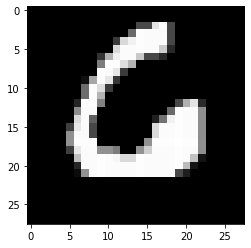

Label: 6
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,

In [5]:
Data_train = torch.utils.data.DataLoader(mnist_trainset, 
                                          batch_size=100, 
                                          shuffle=True,
                                          num_workers=1)
# We have loaded our MNIST dataset into the Dataloader object and can iterate through the dataset as needed
print(Data_train)

train_features, train_labels = next(iter(Data_train))
#iter() calls the __iter__() method on the Data_train which returns an iterator
#next() then calls the __next__() method on that iterator to get the first iteration. Running next() again will get the second item of the iterator, etc
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')
img = train_features[0].squeeze()
#torch.squeeze(input, dim=None, *, out=None) -> Returns a tensor with all the dimensions of input of size 1 removed.
# For example, if input is of shape:(A×1×B×C×1×D) then the out tensor will be of shape: (A×B×C×D).
label = train_labels[0]
plt.imshow(img, cmap = 'gray')
plt.show()
print(f'Label: {label}')
print(train_features)
print(train_labels)

**Don't get confused!!**

Our dataset is divided in smaller compartments called *batches*.

The number of *epochs* is the number of times the whole dataset is passed forward and backward through the neural network at once. Since this would require big computational costs, we need to divide the data in batches of smaller sizes and feed our model with them one by one.

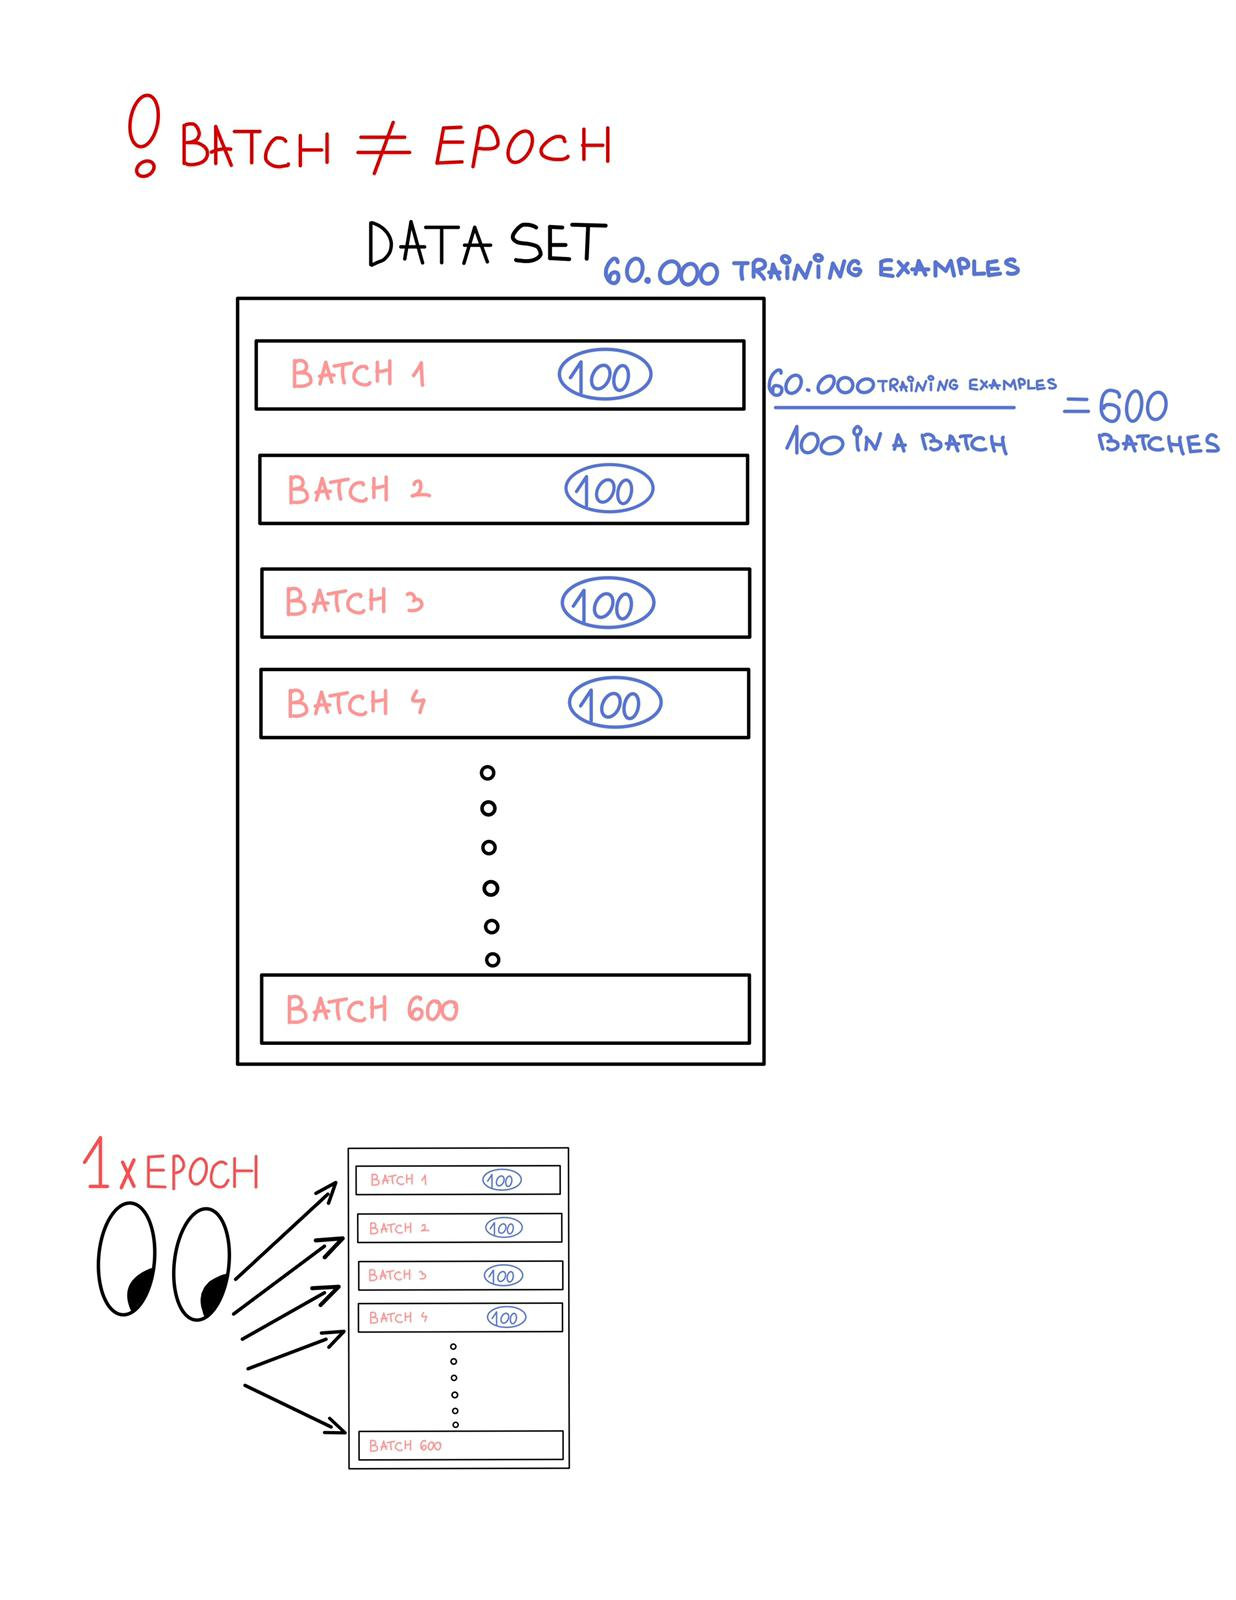

Label of this image: 4


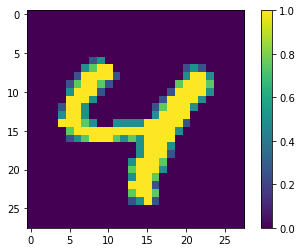

In [8]:
# The iter() function (which in turn calls the __iter__() method) returns an iterator from them. Iterator in Python is simply an object that can be iterated upon
# We use the next() function to manually iterate through all the items of an iterator.
# When we reach the end and there is no more data to be returned, it will raise the StopIteration
# a Python iterator object must implement two special methods, __iter__() and __next__(), collectively called the iterator protocol.

it = iter(Data_train)
first = next(it) # this will output a list with 2 elements, corresponding to the first batch
second = next(it) # # this will output a list with 2 elements, corresponding to the second batch


print(f'Label of this image: {first[1][0].item()}')
#first[0][0] is the first image from the first batch
first[0][0].shape
first_ndarray = first[0][0].squeeze().numpy()
# numpy() function is the converter form torch.Tensor to numpy array.
plt.imshow(first_ndarray)
plt.colorbar()